In [1]:
import pandas as pd
import numpy as np
import csv
import logging
import os
from scipy.stats import pearsonr

from temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.9)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

In [2]:
path = "C:/Users/kumar/Documents/Github/analysis_projects/"
csv_path = os.path.join(path, "csv/")
excel_path = os.path.join(path, "excel/")
plot_path = os.path.join(path, "plot/")
path_shiny_human = os.path.join(csv_path, "current_shiny_human.csv")

In [46]:
fields_shiny = ["cell_name", "roi", "cell_specimen_project", "Norm_Marker_Sum.0.4_label",
                "marker_sum_norm_label", "rna_amplification_pass_fail",
                "percent_cdna_longer_than_400bp", "amplified_quantity_ng", "sample_id", 
                "Tree_call", "seurat_prediction_score_label", "seurat_cluster_label",
                "broad_class_label", "subclass_label"]

shiny_dict = {"Norm_Marker_Sum.0.4_label" : "NMS Pass/Fail",
              "rna_amplification_pass_fail" : "RNA Amp Pass/Fail",
              "marker_sum_norm_label": "NMS score",
              "percent_cdna_longer_than_400bp" : "cDNA quality (%>400 bp)",
              "amplified_quantity_ng" : "Amplified content (ng)",
              "seurat_prediction_score_label": "Seurat prediction score"}

##### Filtering shiny

In [47]:
shiny_human = read_file(path_shiny_human, fields_shiny) #3592 rows
shiny_human.rename(columns=shiny_dict, inplace=True)

INFO:temp_funcs:Read file in as a pandas dataframe


In [48]:
shiny_human["region"] = pd.np.where(shiny_human.roi.str.contains("FCx"), "FCx", 
                                    pd.np.where(shiny_human.roi.str.contains("OCx"), "OCx", 
                                    pd.np.where(shiny_human.roi.str.contains("PCx"), "PCx",
                                    pd.np.where(shiny_human.roi.str.contains("TCx"), "TCx", "Unknown/Misc"))))

shiny_human["layer"] = pd.np.where(shiny_human.roi.str.contains("L1"), "L1", 
                                   pd.np.where(shiny_human.roi.str.contains("L2"), "L2",
                                   pd.np.where(shiny_human.roi.str.contains("L3"), "L3",
                                   pd.np.where(shiny_human.roi.str.contains("L4"), "L4", 
                                   pd.np.where(shiny_human.roi.str.contains("L5"), "L5",
                                   pd.np.where(shiny_human.roi.str.contains("L6"), "L6",
                                   pd.np.where(shiny_human.roi.str.contains("L2-3"), "L2-3",
                                   pd.np.where(shiny_human.roi.str.contains("L3a"), "L3",
                                   pd.np.where(shiny_human.roi.str.contains("L3b"), "L3",
                                   pd.np.where(shiny_human.roi.str.contains("L3c"), "L3",
                                   pd.np.where(shiny_human.roi.str.contains("L6a"), "L6",
                                   pd.np.where(shiny_human.roi.str.contains("LL1"), "LL1", 
                                   pd.np.where(shiny_human.roi.str.contains("LL2"), "LL2", 
                                   pd.np.where(shiny_human.roi.str.contains("LL3"), "LL3",
                                   pd.np.where(shiny_human.roi.str.contains("LL4"), "LL4", 
                                   pd.np.where(shiny_human.roi.str.contains("LL5"), "LL5", "unknown_layer"))))))))))))))))

##### Human Layer 4 DF

In [49]:
h_l4 = filter_df(shiny_human, "layer", "L4")
h_l4 = create_cond_df(h_l4, "region", ["FCx", "OCx", "PCx", "TCx"]) #473 rows

INFO:temp_funcs:Filtered dataframe based on layer == L4
INFO:temp_funcs:Created a conditional dataframe based on region containing ['FCx', 'OCx', 'PCx', 'TCx']


In [50]:
h_l4

,sample_id,cell_name,roi,cDNA quality (%>400 bp),RNA Amp Pass/Fail,Amplified content (ng),cell_specimen_project,NMS score,NMS Pass/Fail,seurat_cluster_label,Seurat prediction score,broad_class_label,subclass_label,Tree_call,region,layer
6,P8S4_180718_354_A01,H18.03.313.11.06.01.05,TCx_L4,0.689,Pass,12.936141,hIVSCC-MET,1.112490,True,Inh L1-2 PAX6 CDH12,1.000000,GABAergic neuron,LAMP5/PAX6/Other,Core,TCx,L4
42,PBS4_181212_501_A01,H18.06.371.12.17.01.01,TCx_L4,0.741,Pass,20.640435,hIVSCC-MET,1.066516,True,Inh L1-2 PAX6 TNFAIP8L3,0.697530,GABAergic neuron,LAMP5/PAX6/Other,Core,TCx,L4
139,P8S4_171017_351_A01,H17.06.013.21.10.01,FCx_L4,0.367,Pass,15.216977,hIVSCC-MET,0.940926,True,Inh L1-4 LAMP5 LCP2 (rosehip),0.999842,GABAergic neuron,LAMP5/PAX6/Other,Core,FCx,L4
142,P8S4_190618_356_A01,H19.03.314.12.07.01.01,TCx_L4,0.479,Pass,35.471986,hIVSCC-MET,0.988428,True,Inh L1-4 LAMP5 LCP2 (rosehip),0.984463,GABAergic neuron,LAMP5/PAX6/Other,Core,TCx,L4
190,P1S4_190813_005_A01,H19.03.319.12.07.01.03,TCx_L4,0.616,Pass,17.497605,hIVSCC-MET,1.372332,True,Inh L2-6 LAMP5 CA1 (Igtp),1.000000,GABAergic neuron,LAMP5/PAX6/Other,Core,TCx,L4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,PHS4_191113_103_A01,H19.29.164.11.11.03,TCx_L4,0.683,Pass,48.357101,hIVSCC-METx,0.991290,True,Exc L2-3 LINC00507 FREM3,0.299389,Glutamatergic neuron,IT (L2-3),PoorQ,TCx,L4
3329,PHS4_191113_105_A01,H19.29.164.11.11.06,TCx_L4,0.209,Fail,5.843088,hIVSCC-METx,0.206155,False,Inh L1-3 SST CALB1,0.219432,GABAergic neuron,PVALB,PoorQ,TCx,L4
3422,PXS4_171206_251_A01,H17.06.015.13.10.01,TCx_L4,0.380,Fail,4.655165,hIVSCC-MET,0.104556,False,Exc L4-5 RORB FOLH1B,0.136398,Glutamatergic neuron,L5/6 CT,PoorQ,TCx,L4
3435,PXS4_190131_306_A01,h19.03.002.12.01.03.01.06,TCx_L4,0.569,Pass,8.987688,hIVSCC-METc,0.441919,True,Exc L2-3 LINC00507 FREM3,0.351331,Glutamatergic neuron,L5 ET,PoorQ,TCx,L4


In [51]:
region_list = ["FCx", "OCx", "PCx", "TCx"]

d = dict()
for region_name in region_list:
    d[region_name] = filter_df(h_l4, "region", region_name)
    
#d["FCx"] #90 rows
#d["OCx"] #5 rows
#d["PCx"] #3 rows
#d["TCx"] #375 rows

INFO:temp_funcs:Filtered dataframe based on region == FCx
INFO:temp_funcs:Filtered dataframe based on region == OCx
INFO:temp_funcs:Filtered dataframe based on region == PCx
INFO:temp_funcs:Filtered dataframe based on region == TCx


In [52]:
piv_df = h_l4[["region", "Tree_call"]]
piv_df["group_count"] = piv_df.groupby(["region", "Tree_call"])["Tree_call"].transform("count")
piv_df["group_total"] = piv_df.groupby("region")["Tree_call"].transform("count")
piv_df["proportion"] = piv_df["group_count"] / piv_df["group_total"]

proportion_table = pd.pivot_table(piv_df, values="proportion", index=["region"], columns="Tree_call", fill_value=0)
count_table = pd.pivot_table(piv_df, values="group_count", index=["region"], columns="Tree_call", fill_value=0)

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [53]:
piv_df

,region,Tree_call,group_count,group_total,proportion
6,TCx,Core,189,375,0.504000
42,TCx,Core,189,375,0.504000
139,FCx,Core,23,90,0.255556
142,TCx,Core,189,375,0.504000
190,TCx,Core,189,375,0.504000
...,...,...,...,...,...
3328,TCx,PoorQ,97,375,0.258667
3329,TCx,PoorQ,97,375,0.258667
3422,TCx,PoorQ,97,375,0.258667
3435,TCx,PoorQ,97,375,0.258667


In [54]:
proportion_table

Tree_call,Core,I1,I2,I3,PoorQ
region,,,,,
FCx,0.255556,0.166667,0.088889,0.011111,0.477778
OCx,0.400000,0.000000,0.200000,0.000000,0.400000
PCx,0.000000,0.333333,0.666667,0.000000,0.000000
TCx,0.504000,0.168000,0.066667,0.002667,0.258667


In [55]:
count_table

Tree_call,Core,I1,I2,I3,PoorQ
region,,,,,
FCx,23,15,8,1,43
OCx,2,0,1,0,2
PCx,0,1,2,0,0
TCx,189,63,25,1,97


##### Plot Colors

In [56]:
tree_colors={"Core": "#41ab5d", "I1": "#2171b5", "I2": "#4292c6", "I3": "#6baed6", "PoorQ": "#ef3b2c"}

##### Countplot of Tree calls for each region

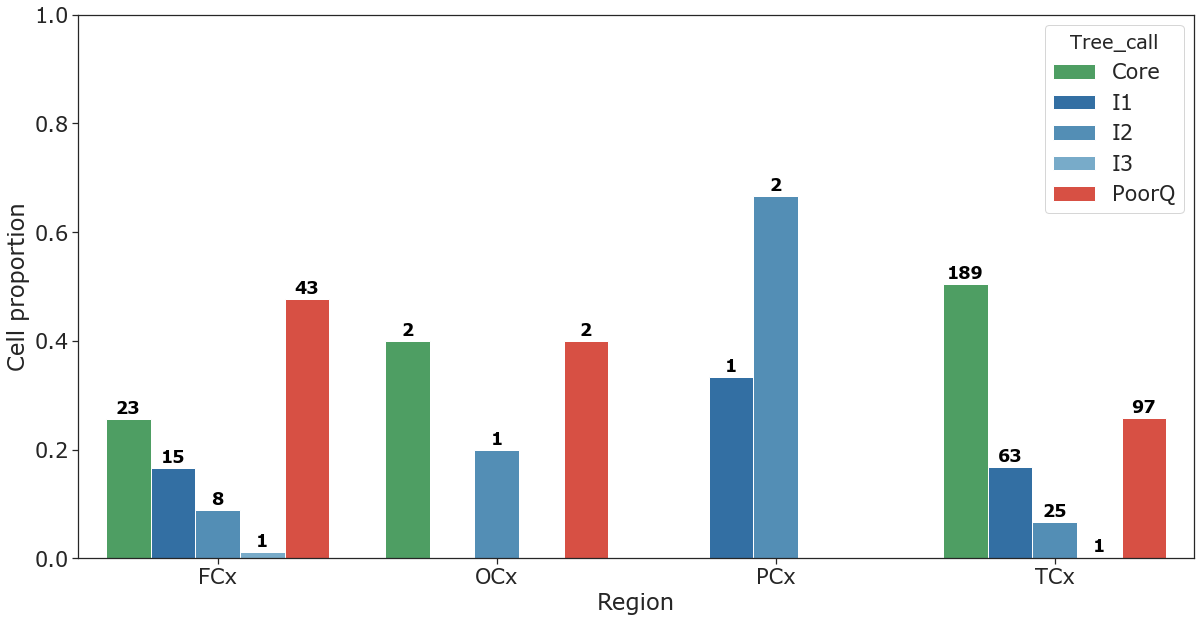

In [57]:
fig_dims = (20, 10)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x="region", y="proportion", data=piv_df, order=["FCx", "OCx", "PCx", "TCx"],
                 hue="Tree_call", hue_order=tree_colors, palette=tree_colors)
ax.set(xlabel="Region", ylabel="Cell proportion")
plt.xticks(rotation=0)
plt.ylim(0, 1.0)


core = [23, 2, 0, 189]
i1 = [15, 0, 1, 63]
i2 = [8, 1, 2, 25]
i3 = [1, 0, 0, 1]
poorq = [43, 2, 0, 97]
count_list = core + i1 + i2 + i3 + poorq

i=0
for p in ax.patches:
    top_rect = p.get_height() + 0.01
    mid_rect = p.get_x() + p.get_width()/2
    label_rect = count_list[i]
    ax.text(mid_rect, top_rect, label_rect,
            ha="center", size="xx-large", color='black', weight='bold')
    i += 1

In [58]:
d["FCx"]["broad_class_label"].value_counts()

Glutamatergic neuron    58
GABAergic neuron        32
Name: broad_class_label, dtype: int64

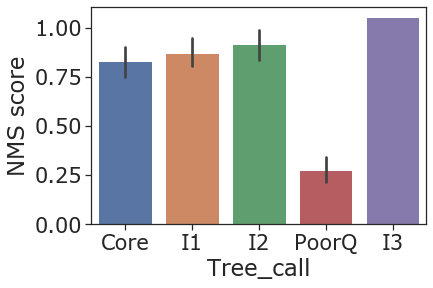

In [59]:
sns.barplot(data=d["FCx"], x="Tree_call", y="NMS score")

In [60]:
d["FCx_glu"] = filter_df(d["FCx"], "broad_class_label", "Glutamatergic neuron")
d["FCx_gab"] = filter_df(d["FCx"], "broad_class_label", "GABAergic neuron")

INFO:temp_funcs:Filtered dataframe based on broad_class_label == Glutamatergic neuron
INFO:temp_funcs:Filtered dataframe based on broad_class_label == GABAergic neuron


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

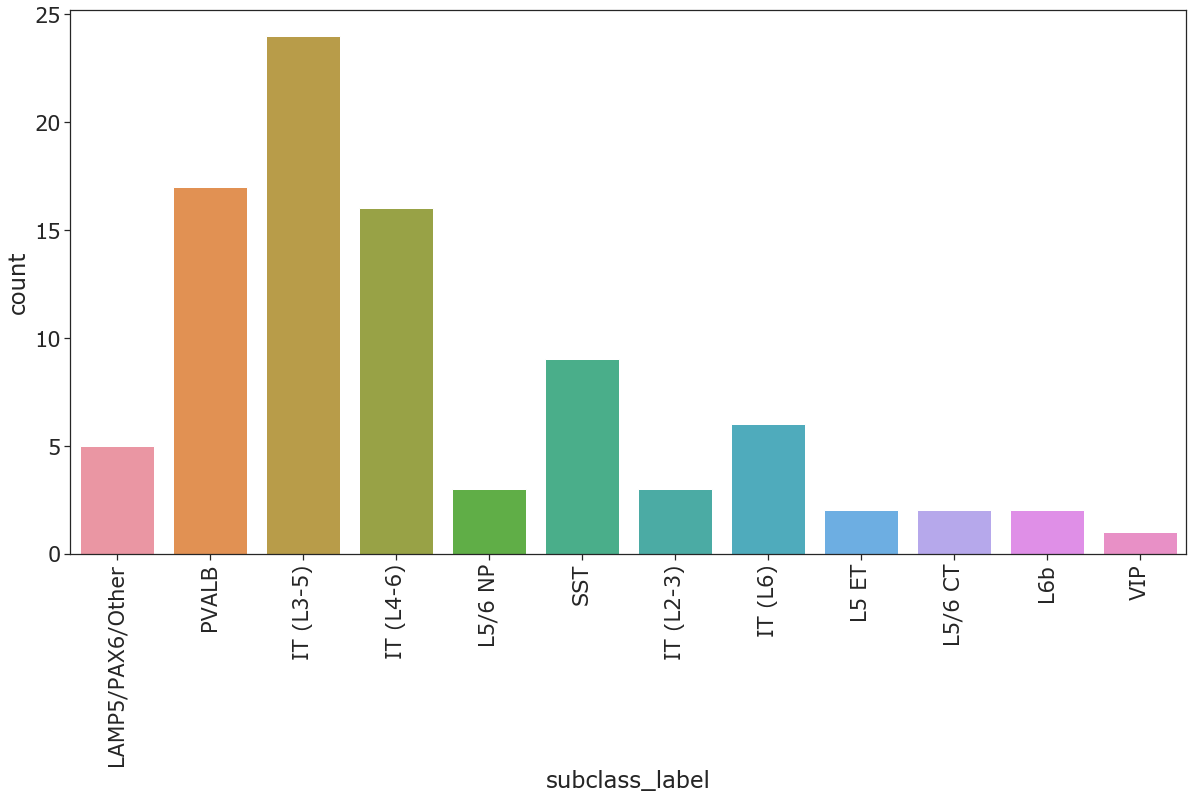

In [61]:
fig_dims = (20, 10)
f, axes = plt.subplots(figsize=fig_dims)

sns.countplot(data=d["FCx"], x="subclass_label")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

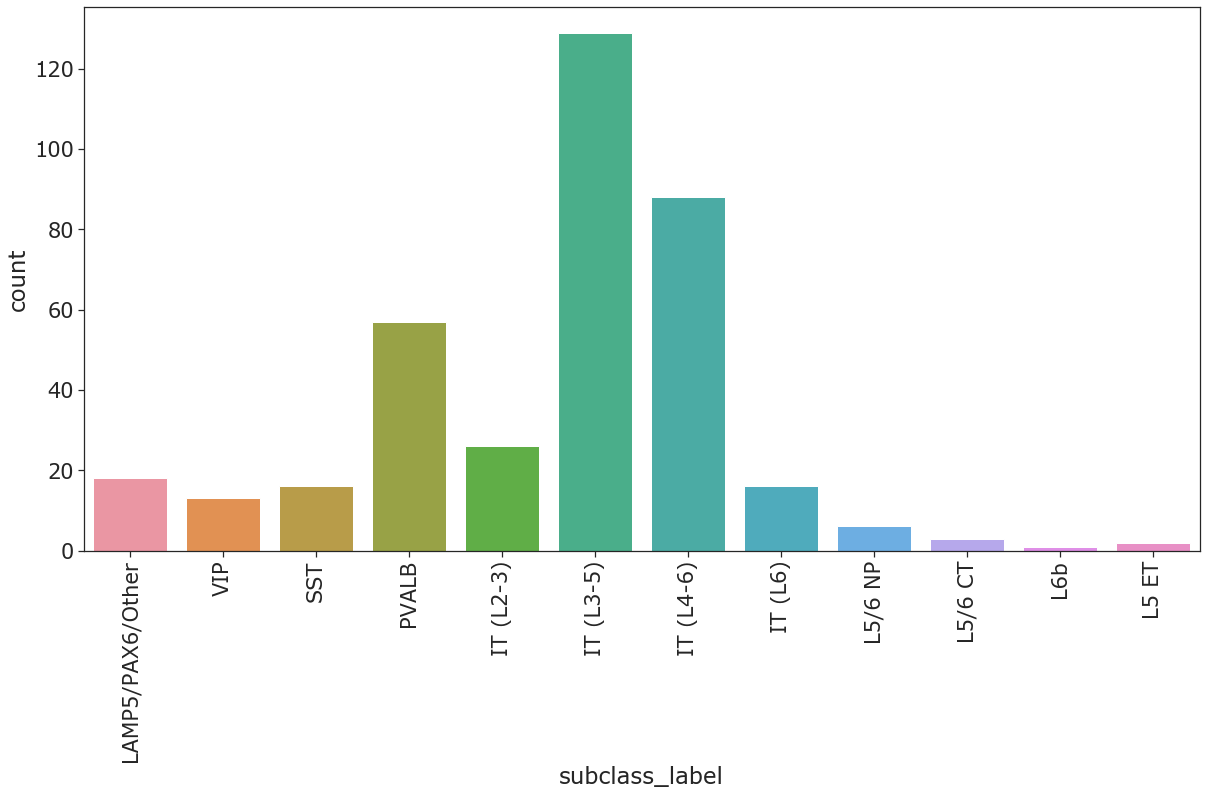

In [62]:
fig_dims = (20, 10)
f, axes = plt.subplots(figsize=fig_dims)

sns.countplot(data=d["TCx"], x="subclass_label")
plt.xticks(rotation=90)